In [108]:

from stock_prediction import ARIMAXGBoost
from stock_prediction.core import GradientDescentRegressor

In [109]:
# # -*- coding: utf-8 -*
# import pandas as pd
# import numpy as np
# test = pd.read_csv("/Users/jamie/Downloads/kaggle/test.csv")
# train = pd.read_csv("/Users/jamie/Downloads/kaggle/train.csv")
# sample_submission = pd.read_csv("/Users/jamie/Downloads/kaggle/sample_submission.csv")


In [110]:
# test

In [111]:
# train

In [112]:
# from sklearn.model_selection import train_test_split
# from skopt import BayesSearchCV
# from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# from skopt.space import Real, Integer, Categorical
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import make_scorer

# # Define the model
# model = GradientDescentRegressor()
# # Define the search space
# params =  {"n_iter": Integer(200,1200),
#            "lr": Real(0.01,0.5),
#            "alpha": Real(0.0001, 0.1),
#            "l1_ratio": Real(0.0001, 0.1),
#            "momentum": Real(0.5, 0.95),
#         #     "batch_size": Integer(32, 256),
#             "rmsprop": Categorical([True, False]),
# }

# # Define the BayesSearchCV object
# # Introduce the new metric RMSLE
# # def rmsle(y_true, y_pred):
# #     return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_true))))


# # Revise the RMSLE function to clip predictions
# def rmsle(y_true, y_pred):
#     y_pred = np.clip(y_pred, a_min=1e-7, a_max=None)  # Prevent log(negative)
#     return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_true))**2))

# # Get the best score
# search = BayesSearchCV(
#     model,
#     params,
#     # n_iter=int(10),
#     scoring=make_scorer(rmsle, greater_is_better=False),
#     cv=5,
#     n_jobs=-1,
#     error_score='raise',
#     random_state=42,
# )


# # Feature engineering
# train["Sex"] = (train["Sex"]=="male").astype(int)
# test["Sex"] = (test["Sex"] == "male").astype(int)
               
# # need standardization
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train = train.drop(columns=['Calories', 'id'])
# X_train = scaler.fit_transform(X_train)
# y_train = train['Calories'].values

# X_test = test.drop(columns=['id'])
# X_test = scaler.transform(X_test)




In [113]:

# # Fit the model with entire labelled data
# search.fit(X_train, y_train) #search is the model
# # Get the best parameters
# best_params = search.best_params_
# print("Best parameters: ", best_params)
# # Get the best score
# best_score = search.best_score_
# print("Best score: ", best_score)

In [114]:
# search.best_estimator_.predict(X_test)
# submission = pd.DataFrame({
#     "id": test["id"],
#     "Calories": search.best_estimator_.predict(X_test)
# })
# submission.to_csv("submission.csv", index=False)
# print("Submission saved to submission.csv")
# submission

In [115]:
# (search.best_estimator_.predict(X_test) < 0).sum()

In [116]:
# sample_submission

In [117]:
# search.cv_results_

In [118]:
from stock_prediction import StockPredictor
stock = StockPredictor("NVDA", "2015-01-01")
stock.load_data()


X =  stock.data.drop(columns="Close")
y = stock.data["Close"]
train_pct_index = int(0.8 * len(stock.data))
X_train, X_test = X[:train_pct_index], X[train_pct_index:]
y_train, y_test = y[:train_pct_index], y[train_pct_index:]


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [119]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1884, 40), (1884,), (471, 40), (471,))

In [120]:
# Import various optimizers
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
# Nesterov
vanilla_sgd = SGDRegressor(loss='squared_error', penalty='elasticnet',random_state=42, verbose=10000,
                           learning_rate='constant', eta0=0.01, alpha=0.0001, l1_ratio=0.5,
                           n_iter_no_change=10,  validation_fraction=0.1,)
# Track loss manually
vanilla_sgd_loss_history = []
n_epochs = 10000
for _ in range(n_epochs):
    vanilla_sgd.partial_fit(X_train, y_train)  # Train for one epoch
    y_pred = vanilla_sgd.predict(X_train)
    loss = mean_squared_error(y_train, y_pred)
    vanilla_sgd_loss_history.append(loss)
  
# Fit the model with entire labelled data
# vanilla_sgd = SGDRegressor(loss='squared_error', random_state=42, verbose=10000)  
# vanilla_sgd.fit(X_train, y_train)



-- Epoch 1
Norm: 2.42, NNZs: 37, Bias: 10.126556, T: 1884, Avg. loss: 1.978825
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 2.45, NNZs: 39, Bias: 10.122236, T: 1884, Avg. loss: 0.081979
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 2.48, NNZs: 38, Bias: 10.124264, T: 1884, Avg. loss: 0.057338
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 2.51, NNZs: 39, Bias: 10.123662, T: 1884, Avg. loss: 0.055309
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 2.54, NNZs: 39, Bias: 10.123716, T: 1884, Avg. loss: 0.051871
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 2.58, NNZs: 39, Bias: 10.123356, T: 1884, Avg. loss: 0.050299
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 2.62, NNZs: 39, Bias: 10.123078, T: 1884, Avg. loss: 0.048661
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 2.65, NNZs: 39, Bias: 10.122843, T: 1884, Avg. loss: 0.047309
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 2.69, NNZs: 38, Bias: 10.122702, T: 1884, Avg. loss: 0.046106
Total tra

In [121]:

import numpy as np
# model2 is selected by Bayesian optimization CV (Seems not good)
model2 = GradientDescentRegressor(alpha = 0.04106938548944606,
                batch_size = 195,
                l1_ratio = 0.09329351308489861,
                lr = 0.1647418008086539,
                momentum = 0.8015665767210205,
                # n_iter = 614,
                n_iter = 5000,
                random_state = 42,
                rmsprop = True
                )
model2.fit(X_train, y_train)


# model3 is model used in the arimaxgboost
model3 = GradientDescentRegressor(
            # n_iter=1000,
            n_iter = 5000,
            lr=0.05,
            alpha=0.01,
            l1_ratio=0.01,
            momentum=0.9,
            rmsprop=False,
            random_state=42,
            # early_stopping=True,
        )
model3.fit(X_train, y_train)


# model4 is rmsprop = True version of model3
model4 = GradientDescentRegressor(
            # n_iter=1000,
            n_iter = 5000,
            lr=0.05,
            alpha=0.01,
            l1_ratio=0.01,
            momentum=0.9,
            rmsprop=True,
            random_state=42,
            # early_stopping=True,
        )
model4.fit(X_train, y_train)


# default model without any tuning (with more iterations for illustration)
model5 = GradientDescentRegressor(
            n_iter=10000,
            rmsprop=False,
            random_state=42,
        )
model5.fit(X_train, y_train)

loss_history2 = np.array(model2.loss_history)
mse_history2 = np.array(model2.mse_history)
# coef_history2 = np.array(model2.coef_history)
# grad_history2 = np.array(model2.grad_history)

loss_history3 = np.array(model3.loss_history)
mse_history3 = np.array(model3.mse_history)
# coef_history3 = np.array(model3.coef_history)
# grad_history3 = np.array(model3.grad_history)

loss_history4 = np.array(model4.loss_history)
mse_history4 = np.array(model4.mse_history)
# coef_history4 = np.array(model4.coef_history)
# grad_history4 = np.array(model4.grad_history)

loss_history5 = np.array(model5.loss_history)
mse_history5 = np.array(model5.mse_history)
# coef_history5 = np.array(model5.coef_history)
# grad_history5 = np.array(model5.grad_history)

from matplotlib import pyplot as plt


In [122]:
loss_history2-mse_history2

array([9.27183144e+54, 9.27183144e+54, 9.27183144e+54, ...,
       9.27183144e+54, 9.27183144e+54, 9.27183144e+54])

In [123]:
loss_history3-mse_history3

array([0., 0., 0., ..., 0., 0., 0.])

In [124]:
loss_history4-mse_history4

array([0., 0., 0., ..., 0., 0., 0.])

In [125]:
mse_diff = (mse_history2 - mse_history3)

In [126]:
# import matplotlib.pyplot as plt
# import pandas as pd
# chart = pd.DataFrame({
#     "Epoch": np.arange(len(loss_history)),
#     "Coef": loss_history,
#     "Coef_": mse_history,
# })

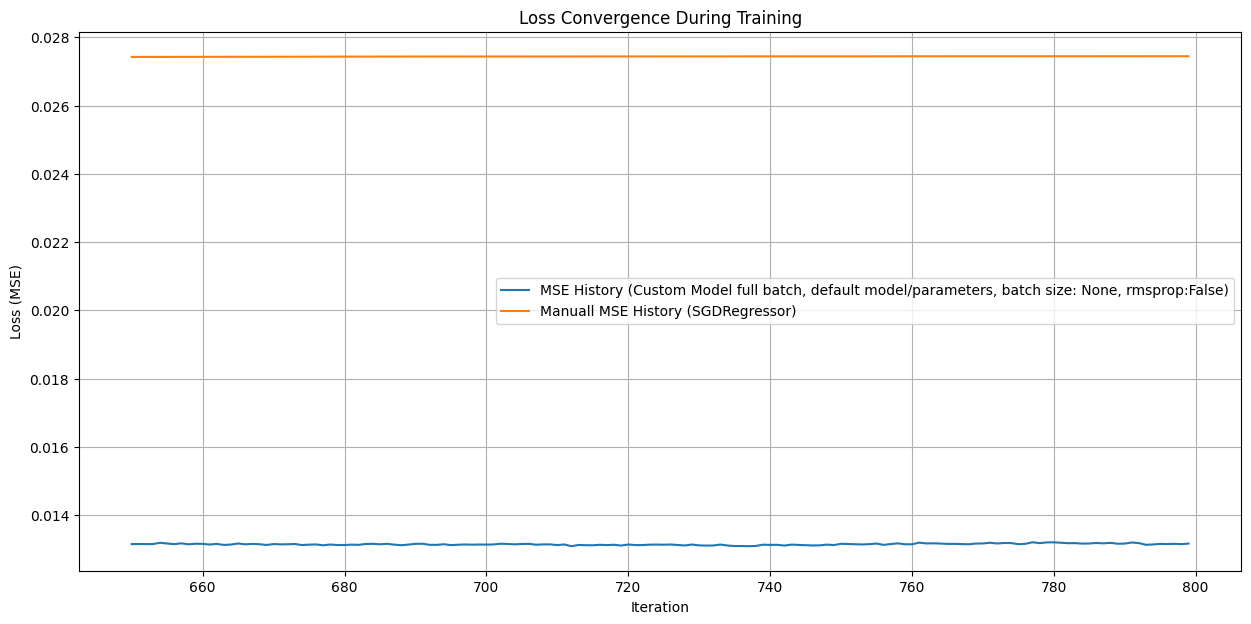

In [127]:
# matches the way of calculating loss 
plt.figure(figsize=(15, 7))
start = 650
end = 800
# plt.plot(range(start,end),mse_history2[start:end], label=f'MSE History (Custom Model mini-batch, batch size:{model2.batch_size}, rmsprop:{model2.rmsprop})')
# plt.plot(range(start,end),mse_history3[start:end], label=f'MSE History (Custom Model full batch, batch size: {model3.batch_size}, rmsprop:{model3.rmsprop})')
# plt.plot(range(start,end),mse_history4[start:end], label=f'MSE History (Custom Model full batch, batch size: {model4.batch_size}, rmsprop:{model4.rmsprop})')
plt.plot(range(start,end),mse_history5[start:end], label=f'MSE History (Custom Model full batch, default model/parameters, batch size: {model5.batch_size}, rmsprop:{model5.rmsprop})')


# plt.plot(range(start,end),loss_history[start:end], label='Loss History (Custom Model)')
plt.plot(range(start,end), np.array(vanilla_sgd_loss_history)[start:end], label='Manuall MSE History (SGDRegressor)')
plt.xlabel("Iteration")
plt.ylabel("Loss (MSE)")
plt.title("Loss Convergence During Training")
plt.legend()
plt.grid(True)
plt.show()


In [128]:
# Want to see TEST loss over epochs
test_vanilla_sgd_loss_history = []
test_vanilla_sgd = SGDRegressor(loss='squared_error', penalty='elasticnet',random_state=42, verbose=10000,
                            learning_rate='constant', eta0=0.01, alpha=0.0001, l1_ratio=0.0001)
for _ in range(n_epochs):
     # Test for one epoch
    test_vanilla_sgd.partial_fit(X_train, y_train)  # Train for one epoch
    y_pred =  test_vanilla_sgd.predict(X_test)
    loss = mean_squared_error(y_test, y_pred)
    test_vanilla_sgd_loss_history.append(loss)


test_model5 = GradientDescentRegressor(
            n_iter=10000,
            rmsprop=False,
            random_state=42,
        )
test_model5._fit_gd(X_train, y_train, X_test, y_test)
test_mse_history5 = np.array(test_model5.val_mse_history)
mse_history5 = np.array(test_model5.mse_history)
  


-- Epoch 1
Norm: 2.41, NNZs: 39, Bias: 10.126551, T: 1884, Avg. loss: 1.979036
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 2.45, NNZs: 39, Bias: 10.122208, T: 1884, Avg. loss: 0.082001
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 2.47, NNZs: 39, Bias: 10.124120, T: 1884, Avg. loss: 0.057449
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 2.50, NNZs: 39, Bias: 10.123347, T: 1884, Avg. loss: 0.055363
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 2.54, NNZs: 39, Bias: 10.123395, T: 1884, Avg. loss: 0.051900
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 2.57, NNZs: 39, Bias: 10.123087, T: 1884, Avg. loss: 0.050293
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 2.61, NNZs: 39, Bias: 10.122914, T: 1884, Avg. loss: 0.048629
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 2.65, NNZs: 39, Bias: 10.122716, T: 1884, Avg. loss: 0.047313
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 2.68, NNZs: 39, Bias: 10.122557, T: 1884, Avg. loss: 0.046112
Total tra

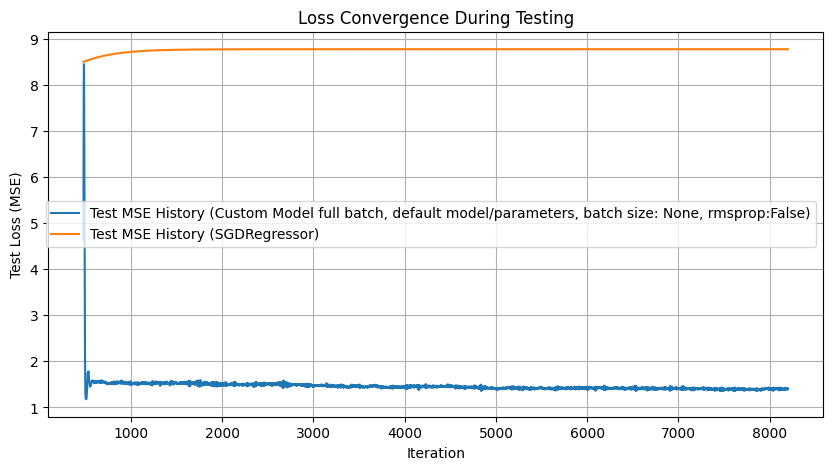

In [142]:
plt.figure(figsize=(10, 5))
start = 480
end = 8200
plt.plot(range(start,end),test_mse_history5[start:end], label=f'Test MSE History (Custom Model full batch, default model/parameters, batch size: {model5.batch_size}, rmsprop:{model5.rmsprop})')
plt.plot(range(start,end), np.array(test_vanilla_sgd_loss_history)[start:end], label='Test MSE History (SGDRegressor)')
plt.xlabel("Iteration")
plt.ylabel("Test Loss (MSE)")
plt.title("Loss Convergence During Testing")
plt.legend()
plt.grid(True)
plt.show()


In [130]:

# Find global minima and maxima indexes
import pandas as pd

np.argmin(test_mse_history5) 



510

In [131]:
np.argmin(mse_history5) # train

825

In [132]:
np.argmin(vanilla_sgd_loss_history)

609

In [133]:
np.argmin(np.array(test_vanilla_sgd_loss_history))


0

In [134]:
min(test_mse_history5), min(test_vanilla_sgd_loss_history)

(1.1776390024804413, 7.566553403443744)

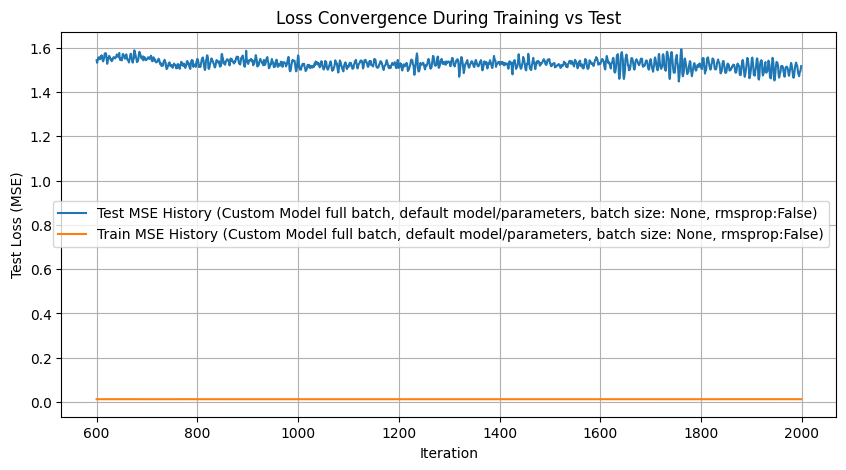

In [135]:
plt.figure(figsize=(10, 5))
start = 600
end = 2000
plt.plot(range(start,end),test_mse_history5[start:end], label=f'Test MSE History (Custom Model full batch, default model/parameters, batch size: {model5.batch_size}, rmsprop:{model5.rmsprop})')
plt.plot(range(start,end),mse_history5[start:end], label=f'Train MSE History (Custom Model full batch, default model/parameters, batch size: {model5.batch_size}, rmsprop:{model5.rmsprop})')
# plt.plot(range(start,end), np.array(vanilla_sgd_loss_history)[start:end], label='Train MSE History (SGDRegressor)')
# plt.plot(range(start,end), np.array(test_vanilla_sgd_loss_history)[start:end], label='Test MSE History (SGDRegressor)')
plt.xlabel("Iteration")
plt.ylabel("Test Loss (MSE)")
plt.title("Loss Convergence During Training vs Test")
plt.legend()
plt.grid(True)
plt.show()


## Note: 
- No need to get RMSprop for full batch as it fluctuates while the loss function is always lower for ones without RMSprop.
- It is necessary to have rmsprop for mini-batch and stochastic gd.
- Mini-batch/s trade efficiency by accuracy.